In [4]:
from sympy import Symbol
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import apply_matplotlib_settings
from sympy import (
    init_printing,
    symbols,
    expand,
    factor,
    solve,
    Eq,
    sin,
    cos,
    tan,
    simplify,
    reduce_inequalities,
    Indexed,
    Sum,
    lambdify,
    oo,
    exp,
    factorial,
    plot,
    diff,
    limit,
)
from sympy.plotting import plot, plot3d_parametric_line, plot3d
from sympy.solvers.inequalities import reduce_rational_inequalities
from sympy.stats import Poisson, Exponential, Binomial, density, moment, E, cdf
import matplotlib.pyplot as plt

# Enable the mathjax printer
init_printing(use_latex="mathjax")
apply_matplotlib_settings()

In [8]:
x = Symbol("x")
y = Symbol("y")

e = (x + y) ** 2
e.expand()

x**2 + 2*x*y + y**2

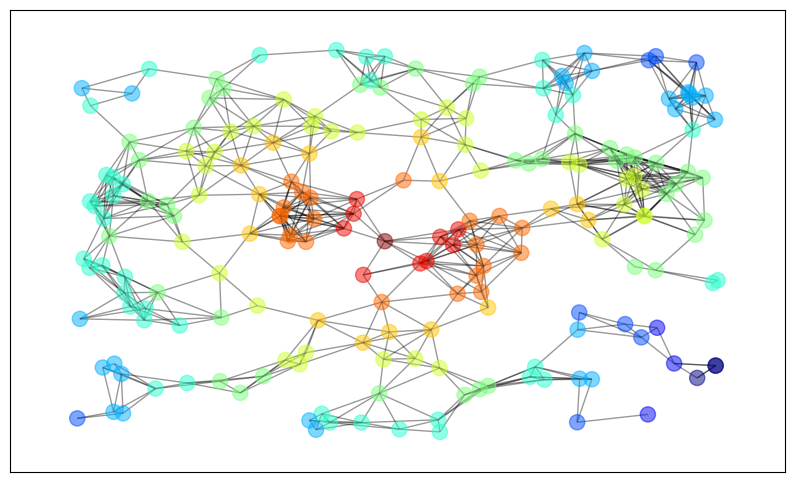

In [10]:
%matplotlib inline
import numpy as np
import networkx as nx
plt.rcParams['figure.figsize'] = (10,6)
np.random.seed(1234)

# Generate a random graph
p = dict((i, (np.random.uniform(0, 1), np.random.uniform(0, 1)))
         for i in range(200))
g = nx.random_geometric_graph(200, 0.12, pos=p)
pos = nx.get_node_attributes(g, 'pos')

# Find node nearest the center point (0.5, 0.5)
dists = [(x - 0.5)**2 + (y - 0.5)**2 for x, y in list(pos.values())]
ncenter = np.argmin(dists)

# Plot graph, coloring by path length from central node
p = nx.single_source_shortest_path_length(g, ncenter)
plt.figure()
nx.draw_networkx_edges(g, pos, alpha=0.4)
nx.draw_networkx_nodes(g,
                       pos,
                       nodelist=list(p.keys()),
                       node_size=120, alpha=0.5,
                       node_color=list(p.values()),
                       cmap=plt.cm.jet_r)
plt.show()

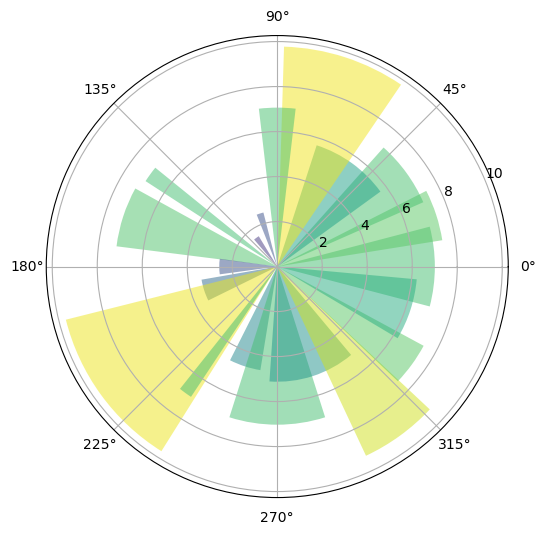

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
θ = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(θ, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

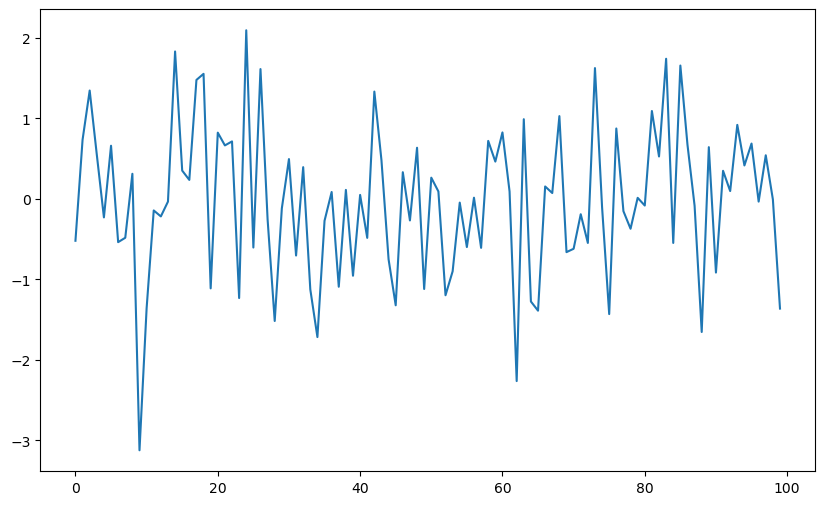

In [13]:
rand = np.random.randn(100)
plt.plot(rand)

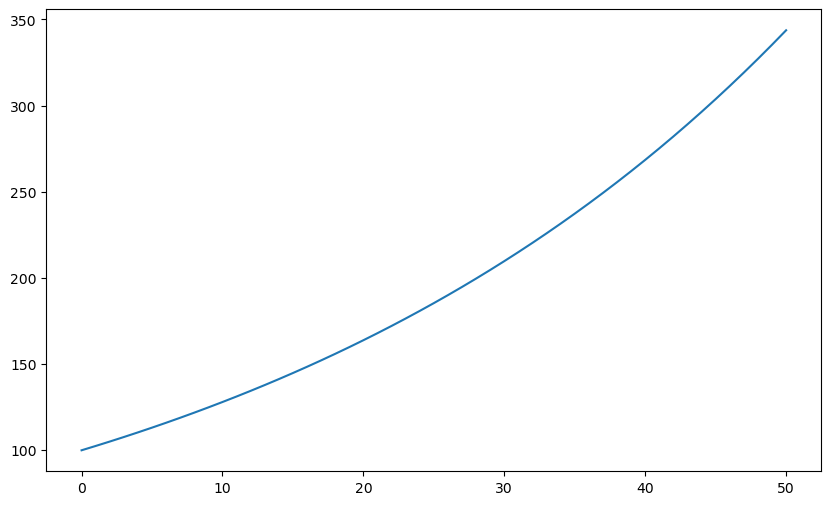

In [16]:
balance = 100
rate = 0.025
T = 50
b = np.empty(T + 1)
b[0] = balance

for t in range(T):
    b[t + 1] = (1 + rate) * b[t]

plt.plot(b)

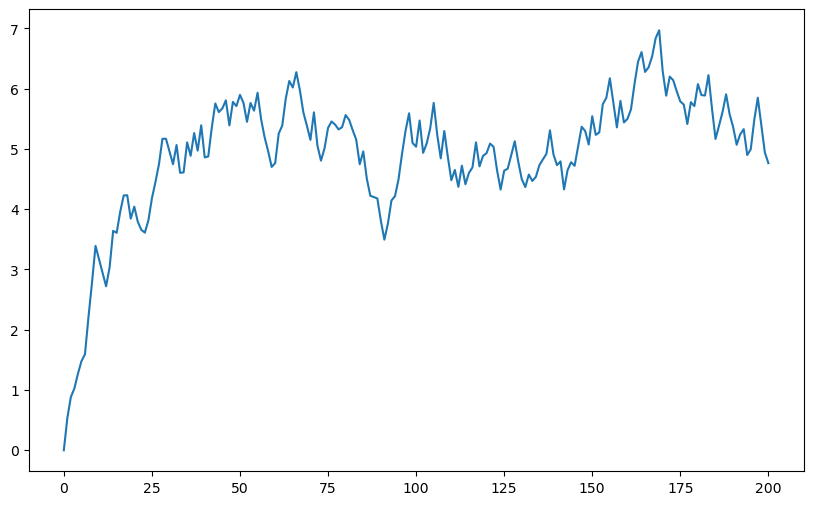

In [17]:
T = 200
a = 0.9
s = np.empty(T + 1)
s[0] = 0

for t in range(T):
    s[t + 1] = s[t] * a + np.random.rand()

plt.plot(s)

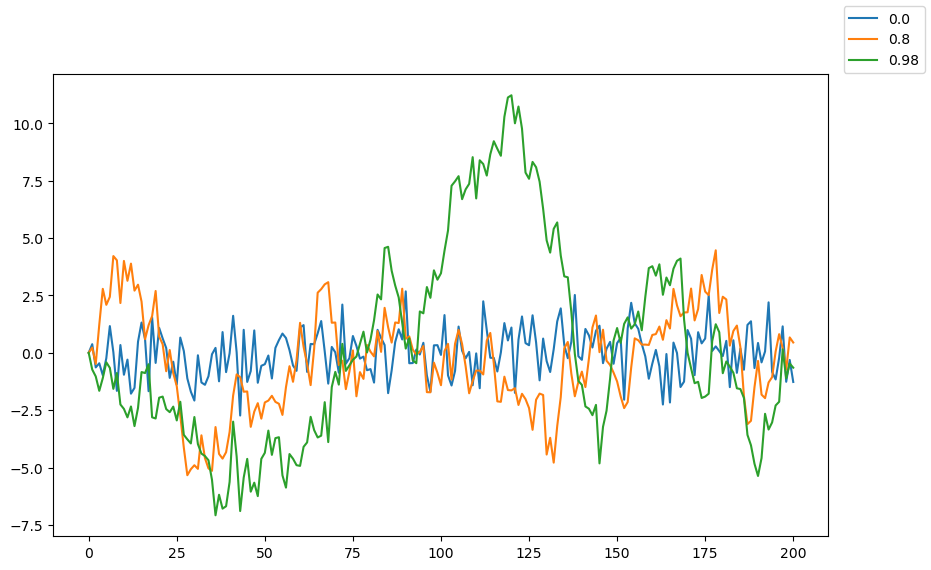

In [40]:
T = 200
a = np.array([0, 0.8, 0.98])
s = np.array([np.empty(T + 1) for _ in range(len(a))])
fig, ax = plt.subplots()

for i in range(s.shape[0]):
    s[i][0] = 0
for i in range(s.shape[0]):
    for t in range(T):
        s[i][t + 1] = s[i][t] * a[i] + np.random.randn()
    ax.plot(s[i], label=f"{a[i]}")

fig.legend()
fig.show()

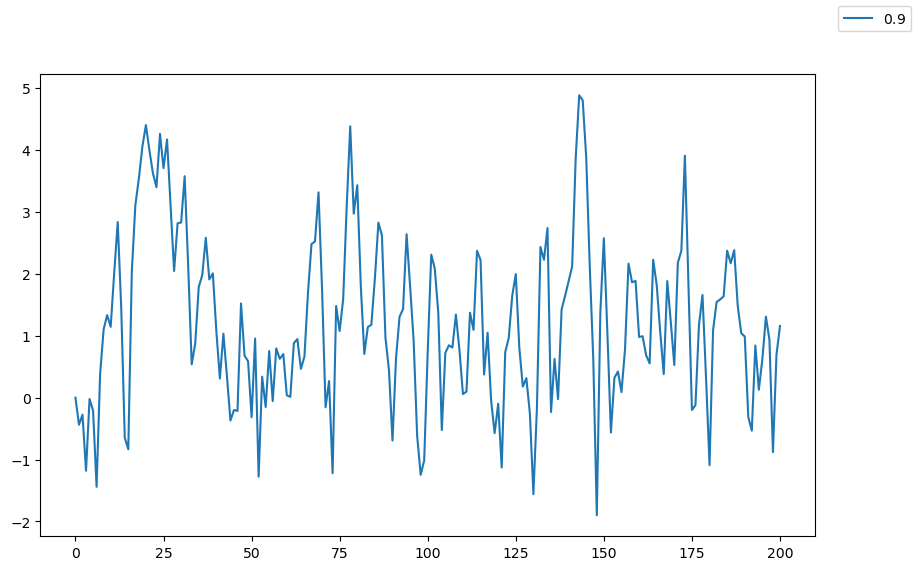

In [45]:
T = 200
a = 0.9
s = np.empty(T + 1)
s[0] = 0

for t in range(T):
    s[t + 1] = np.abs(s[t]) * a + np.random.randn()

fig, ax = plt.subplots()
ax.plot(s, label=f"${a}$")
fig.legend()
fig.show()

### Pi using Monte Carlo

In [50]:
n = int(1e6)
count = 0
r = 0.5
for i in range(n):
    x = np.random.uniform()
    y = np.random.uniform()
    d = np.sqrt((x - r) ** 2 + (y - r) ** 2)
    if d < r:
        count += 1

area_estimate = count / n
print(area_estimate / (r**2))

3.141248


### Chaos

In [8]:
class Chaos:
    """
    Models the dynamical system :math:`x_{t+1} = r x_t (1 - x_t)`
    """

    def __init__(self, x0, r):
        """
        Initialize with state x0 and parameter r
        """
        self.x, self.r = x0, r

    def update(self):
        "Apply the map to update state."
        self.x = self.r * self.x * (1 - self.x)

    def generate_sequence(self, n):
        "Generate and return a sequence of length n."
        path = []
        for i in range(n):
            path.append(self.x)
            self.update()
        return path

#### Sequence

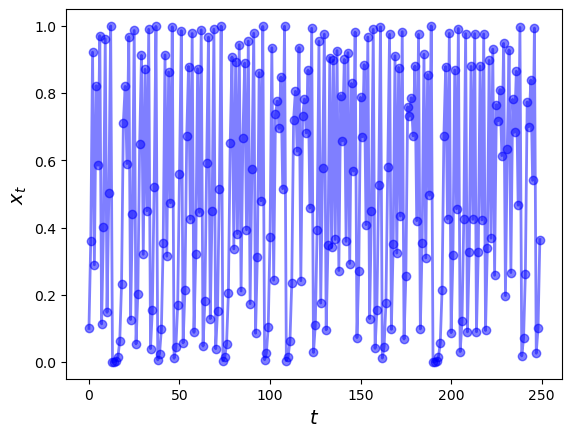

In [9]:
ch = Chaos(0.1, 4.0)
ts_length = 250

fig, ax = plt.subplots()
ax.set_xlabel("$t$", fontsize=14)
ax.set_ylabel("$x_t$", fontsize=14)
x = ch.generate_sequence(ts_length)
ax.plot(range(ts_length), x, "bo-", alpha=0.5, lw=2, label="$x_t$")
plt.show()

#### Bifurcation

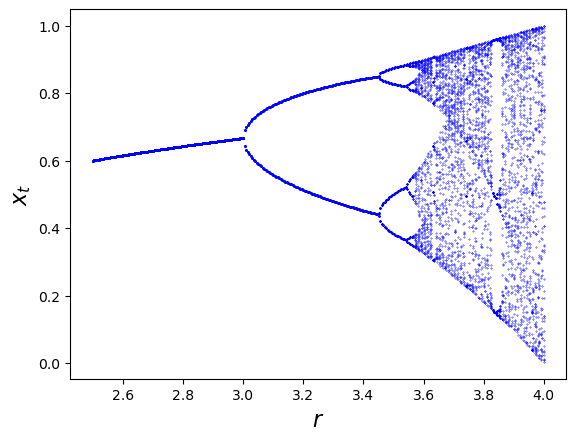

In [7]:
fig, ax = plt.subplots()
ch = Chaos(0.1, 4)
r = 2.5
while r < 4:
    ch.r = r
    t = ch.generate_sequence(1000)[950:]
    ax.plot([r] * len(t), t, "b.", ms=0.6)
    r = r + 0.005

ax.set_xlabel("$r$", fontsize=16)
ax.set_ylabel("$x_t$", fontsize=16)
plt.show()

### Numpy

In [12]:
np.zeros((3,))

array([0., 0., 0.])

In [14]:
np.linspace(4, 2, 5)

array([4. , 3.5, 3. , 2.5, 2. ])

In [16]:
np.eye(3, dtype=int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [24]:
np.eye(4)[2:4, 2:4]

array([[1., 0.],
       [0., 1.]])

In [32]:
z = np.ones((3, 4), dtype=int)
a = z.cumsum()
a.shape = z.shape
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [40]:
np.eye(10).var()

0.09

In [47]:
np.linspace(4, 2, 5).searchsorted(4)

5

In [60]:
a = np.eye(3) * 3
b = np.ones((3, 3)) * 2
a * b

array([[6., 0., 0.],
       [0., 6., 0.],
       [0., 0., 6.]])

### Exercise

In [7]:
def p(x, coefficients):
    c = np.array(coefficients)
    xs = np.array([x**i for i in range(len(coefficients))])
    print(c)
    print(xs)
    return c @ xs

In [9]:
p(2, [1, 2, 3])

[1 2 3]
[1 2 4]


17

In [33]:
from random import uniform


def sample(p):
    u = uniform(0, 1)
    return p.cumsum().searchsorted(u)


vals = np.array([1, 2, 4])
vals = vals / vals.sum()
sample(vals)

2

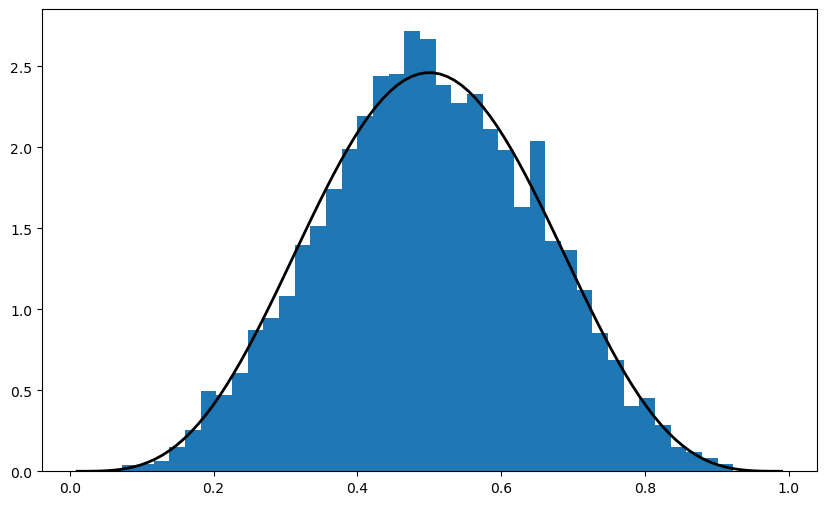

In [9]:
%matplotlib inline
from scipy.stats import beta
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

q = beta(5, 5)      # Beta(a, b), with a = b = 5
obs = q.rvs(5000)   # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

1.009453279681861 2.3831540249193566


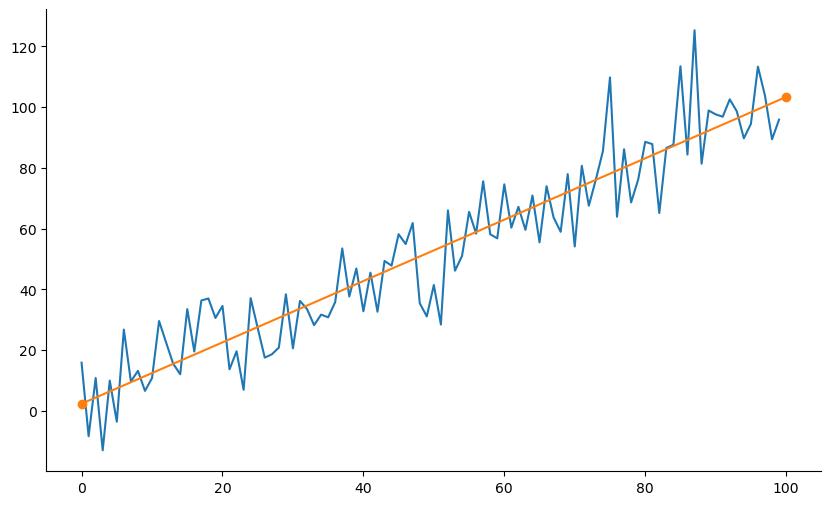

In [44]:
from scipy.stats import linregress

x = np.linspace(0, 99, 100)
y = np.linspace(0, 99, 100) + 2 + np.random.randn(100) * 10

slope, intercept, _, __, ___ = linregress(x, y)
print(slope, intercept)
fig, ax = plt.subplots()
ax.plot(x, y)
# x1 = [0, intercept]
# y1 = [100, slope * 100 + intercept]
x1 = [0, 100]
y1 = [intercept, slope * 100 + intercept]
ax.plot(x1, y1, marker="o")
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
fig.show()

In [2]:
pd.Series(np.random.randn(5), name="Things")

0   -0.775138
1    1.025441
2    0.583375
3   -0.554308
4   -2.200717
Name: Things, dtype: float64

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv"
)
type(df)

pandas.core.frame.DataFrame

In [21]:
is_large = df.POP > 20000
# is_large[0] = False
df.loc[df.index[1:3], ["country", "POP"]]

,country,POP
1,Australia,19053.186
2,India,1006300.297


In [22]:
df.query("country in ['Argentina', 'India', 'South Africa'] and POP > 20000")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.99950,2.950722e+05,75.716805,5.578804
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546


In [27]:
df[df.country.isin(["Argentina", "India", "South Africa"]) & (df.POP > 4e4)]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546


## Sympy

In [6]:
x, y, z = symbols("x y z")

In [15]:
z = (x + y) ** 2
e = expand(z)
factor(e)

       2
(x + y) 

In [18]:
solve(e)

[{x: -y}]

In [22]:
eq = Eq(e, 2)
solve(eq, x)

[-y - √2, -y + √2]

### Solving things

In [25]:
solve([x**2 - 2, x**4 - 4], [x, x])

[(-√2,), (√2,)]

In [26]:
solve([x**2 + y, y**2 + x], [x, y])

⎡                  ⎛           2          ⎞  ⎛           2          ⎞⎤
⎢                  ⎜ ⎛1   √3⋅ⅈ⎞   1   √3⋅ⅈ⎟  ⎜ ⎛1   √3⋅ⅈ⎞   1   √3⋅ⅈ⎟⎥
⎢(-1, -1), (0, 0), ⎜-⎜─ - ────⎟ , ─ - ────⎟, ⎜-⎜─ + ────⎟ , ─ + ────⎟⎥
⎣                  ⎝ ⎝2    2  ⎠   2    2  ⎠  ⎝ ⎝2    2  ⎠   2    2  ⎠⎦

In [31]:
(x**2 + y).subs(x, -1).subs(y, -1)

0

In [41]:
e = Eq((sin(x) * cos(x)) / tan(x), 0)
expand(simplify(e))

   2       
cos (x) = 0

In [43]:
A, s, k, α, δ = symbols("A s k^* α δ")
solow = Eq(s * A * k**α + (1 - δ) * k, k)
solve(solow, k)

⎡      -1  ⎤
⎢     ─────⎥
⎢     α - 1⎥
⎢⎛A⋅s⎞     ⎥
⎢⎜───⎟     ⎥
⎣⎝ δ ⎠     ⎦

In [51]:
# reduce_inequalities([2 * x + 5 * y <= 30, 4 * x + 2 * y <= 20], [x])
reduce_inequalities([x < y, y < 6], [y])

y > x ∧ -∞ < y ∧ y < 6

In [57]:
x, y, i, j = symbols("x y i j")
sum_xy = Sum(Indexed("x", i) * Indexed("x", j), (i, 0, 3), (j, 0, 3))
sum_xy

  3     3            
 ___   ___           
 ╲     ╲             
  ╲     ╲            
  ╱     ╱   x[i]⋅x[j]
 ╱     ╱             
 ‾‾‾   ‾‾‾           
j = 0 i = 0          

In [64]:
lam_xy = lambdify([x, y], sum_xy)
grid = np.arange(0, 4, 1)
lam_xy(grid, grid)

36

In [5]:
D, i = symbols("D_0, i")
r = symbols("r", positive=True)
Dt = Sum("(1 - r) ^ i * D_0", (i, 0, oo))
Dt

  ∞              
 ___             
 ╲               
  ╲             i
  ╱   D₀⋅(1 - r) 
 ╱               
 ‾‾‾             
i = 0            

In [6]:
Dt.doit()

   ⎛⎧      1                        ⎞
   ⎜⎪      ─         for │r - 1│ < 1⎟
   ⎜⎪      r                        ⎟
   ⎜⎪                               ⎟
   ⎜⎪  ∞                            ⎟
   ⎜⎪ ___                           ⎟
D₀⋅⎜⎨ ╲                             ⎟
   ⎜⎪  ╲          i                 ⎟
   ⎜⎪  ╱   (1 - r)      otherwise   ⎟
   ⎜⎪ ╱                             ⎟
   ⎜⎪ ‾‾‾                           ⎟
   ⎜⎪i = 0                          ⎟
   ⎝⎩                               ⎠

In [7]:
simplify(Dt.doit())

⎧       D₀                           
⎪       ──          for r > 0 ∧ r < 2
⎪       r                            
⎪                                    
⎪     ∞                              
⎪    ___                             
⎨    ╲                               
⎪     ╲          i                   
⎪D₀⋅  ╱   (1 - r)       otherwise    
⎪    ╱                               
⎪    ‾‾‾                             
⎪   i = 0                            
⎩                                    

In [14]:
l = symbols("lambda")
x = symbols("x", integer=True, positive=True)
pmf = l**x * exp(-l) / factorial(x)
sum_pmf = Sum(pmf, (x, 0, oo))
sum_pmf

  ∞         
 ____       
 ╲          
  ╲    x  -λ
   ╲  λ ⋅ℯ  
   ╱  ──────
  ╱     x!  
 ╱          
 ‾‾‾‾       
x = 0       

In [15]:
sum_pmf.doit()

1

In [17]:
ex = Sum(x * pmf, (x, 0, oo))
ex.doit()

λ

<string>:1: RuntimeWarning: invalid value encountered in power
<string>:1: RuntimeWarning: divide by zero encountered in double_scalars


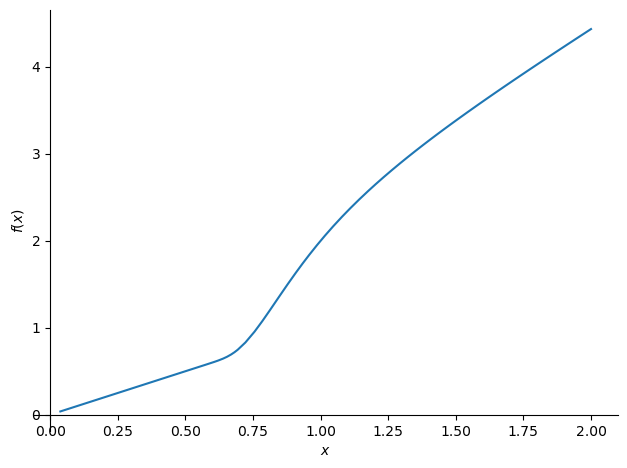

In [30]:
p = plot(x ** exp(1 / x**2) + x, (x, 0, 2))

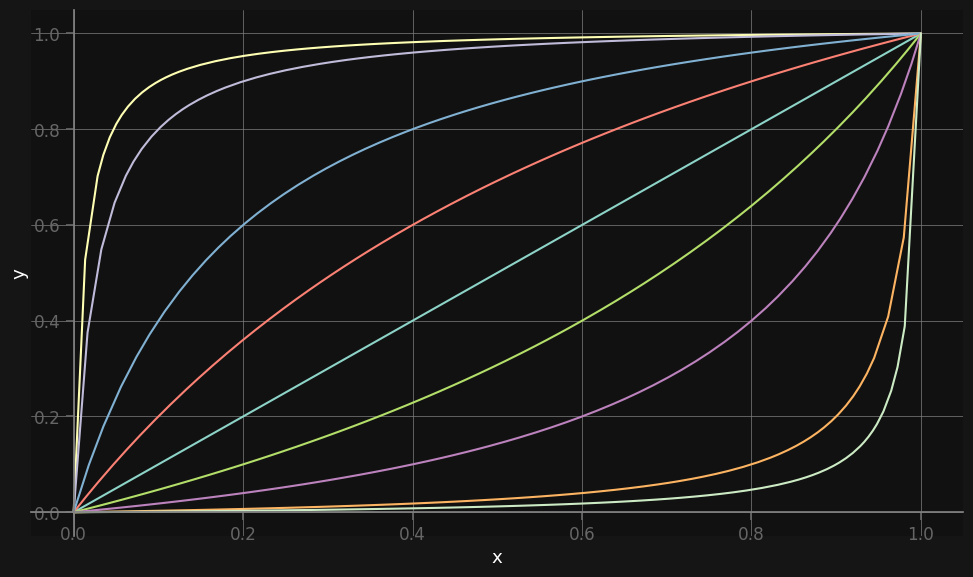

In [4]:
x, y, a, b = symbols("x y alpha beta")
u_a = x**a * y ** (1 - a)
u_b = (1 - x) ** b * (1 - y) ** (1 - b)
pareto = Eq(diff(u_a, x) / diff(u_a, y), diff(u_b, x) / diff(u_b, y))
sol = solve(pareto, y)[0]

# Plot a range of αs and βs
params = [
    {a: 0.5, b: 0.5},
    {a: 0.1, b: 0.9},
    {a: 0.1, b: 0.8},
    {a: 0.8, b: 0.9},
    {a: 0.4, b: 0.8},
    {a: 0.8, b: 0.1},
    {a: 0.9, b: 0.8},
    {a: 0.8, b: 0.4},
    {a: 0.9, b: 0.1},
]

p = plot(xlabel="x", ylabel="y", show=False)

for param in params:
    p_add = plot(sol.subs(param), (x, 0, 1), show=False)
    p.append(p_add[0])
p.show()

In [5]:
x, y = symbols("x y")
top = y**x - 1
bottom = x
f = top / bottom
limit(diff(top, x) / diff(bottom, x), x, 0)

log(y)

In [ ]:
x, n, the = symbols("x n theta")

f_upper = factorial(n) * the**x * (1 - the) ** (n - x)
f_lower = factorial(x) * factorial(n - x)